In [52]:
%load_ext autoreload
%autoreload 2

from import_file import*


path = Path.cwd() / "processed_data" / "df_raw.pkl"
df_raw = pd.read_pickle(path)

## Feature Extraction

# Specifiying features and labels
X = df_raw['statement']
y = df_raw['label']

# Specifying train and test split with ratio of 80:20
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 0, stratify=y)
print(len(X_train), len(X_test))
print(len(y_train), len(y_test))

## Defining functions

stemmer = PorterStemmer()

def tokenizer(input_string):
    words = re.sub(r"[^A-Za-z0-9-]", " ", input_string) # Replace everything except a-zA-Z0-9- by a space
    words = words.lower() # Lowering
    words = words.split() # Split a string into a list  
    words = [stemmer.stem(word) for word in words] #Stemming
    return words

# Stopwords list set to english
stopwords_list = stopwords.words('english')

def print_results():
    print("Accuracy: ", accuracy_score(y_test, y_pred))
    #model_accuracy.append(accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    #print(confusion_matrix(y_test, y_pred))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
10268 2568
10268 2568


In [93]:
print(confusion_matrix(y_test, y_pred))

[[ 73  87 107  80  25  50]
 [ 70 143 109  93  18  69]
 [ 65 110 143 110  30  70]
 [ 70  97 120 104  14  88]
 [ 36  48  37  37  24  28]
 [ 32  78  94  95   6 108]]


In [94]:
def display_confusion_matrix(cm, classes, title='Confusion Matrix'):
    df_cm = pd.DataFrame(cm, index = classes, columns = classes)
    size = (10, 8)
    fig, ax = plt.subplots(figsize = size)
    sns.heatmap(df_cm, annot=True, cmap="Blues", center=0, fmt='g')
    ax.set_ylabel('Actual')    
    ax.set_xlabel('Predicted')
    plt.title(title)

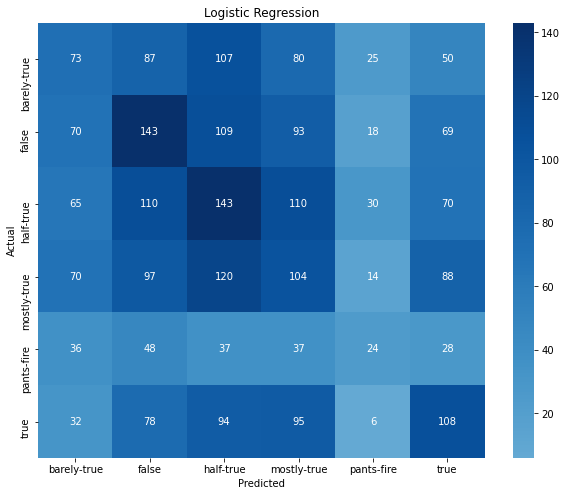

In [95]:
display_confusion_matrix(confusion_matrix(y_test, y_pred), loaded_model.classes_, 'Logistic Regression')

In [96]:
def display_confusion_matrix(cm,  title='Confusion Matrix'):
    classes = ['pants-fire', 'false', 'barely-true', 'half-true', 'mostly-true', 'true'] # wrong
    df_cm = pd.DataFrame(cm, index = classes, columns = classes)
    size = (10, 8)
    fig, ax = plt.subplots(figsize = size)
    sns.heatmap(df_cm, annot=True, cmap="Blues", center=0, fmt='g')
    ax.set_ylabel('Actual')    
    ax.set_xlabel('Predicted')
    plt.title(title)

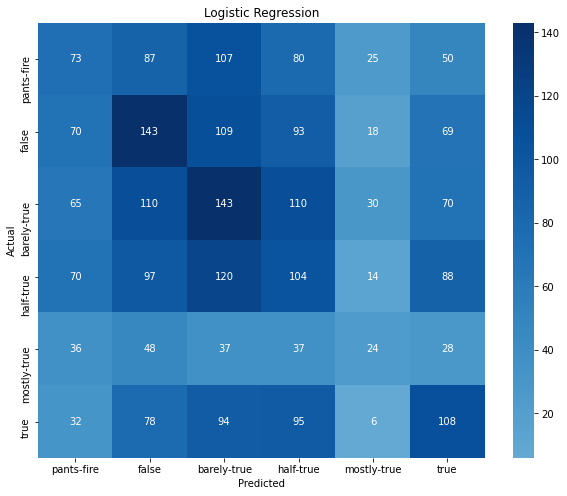

In [97]:
display_confusion_matrix(confusion_matrix(y_test, y_pred),  'Logistic Regression')

# Pipe 1

In [54]:
## Creating Pipeline `pipe1` with CountVectorizer with Custom preprocessing, Tokenisation, Stopwords, Normalisation (using TFIDFTransformer), Feature selection and Logistic regression classifier

pipe1 = Pipeline([
    ('vectorizer', CountVectorizer(analyzer='word',tokenizer=tokenizer,stop_words=stopwords_list)),
    ('transformer', Binarizer()),
    ('clf', LogisticRegression(solver='liblinear', random_state=0)),
])

# Fit the model using training set
pipe1.fit(X_train, y_train)

Pipeline(steps=[('vectorizer',
                 CountVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...],
                                 tokenizer=<function tokenizer at 0x000001EB3CFA83A0>)),
                ('transformer', Binarizer()),
                ('clf',
                 LogisticRegression(random_state=0, solver='liblinear'))])

In [55]:
y_pred = pipe1.predict(X_test)

print_results() 

Accuracy:  0.23169781931464176
              precision    recall  f1-score   support

 barely-true       0.21      0.17      0.19       422
       false       0.25      0.28      0.27       502
   half-true       0.23      0.27      0.25       528
 mostly-true       0.20      0.21      0.21       493
  pants-fire       0.21      0.11      0.15       210
        true       0.26      0.26      0.26       413

    accuracy                           0.23      2568
   macro avg       0.23      0.22      0.22      2568
weighted avg       0.23      0.23      0.23      2568



In [50]:
# Save model
path = Path.cwd() / "saved_model" / "zz_pipe1_LR.pkl"
with path.open('wb') as f:
    pickle.dump(pipe1, f)

In [51]:
# Make predictions using testing set
path = Path.cwd() / "saved_model" / "zz_pipe1_LR.pkl"
with open(path, 'rb') as f:
    loaded_model = pickle.load(f)
y_pred = loaded_model.predict(X_test)

print_results() 

Accuracy:  0.23169781931464176
              precision    recall  f1-score   support

 barely-true       0.21      0.17      0.19       422
       false       0.25      0.28      0.27       502
   half-true       0.23      0.27      0.25       528
 mostly-true       0.20      0.21      0.21       493
  pants-fire       0.21      0.11      0.15       210
        true       0.26      0.26      0.26       413

    accuracy                           0.23      2568
   macro avg       0.23      0.22      0.22      2568
weighted avg       0.23      0.23      0.23      2568



In [19]:
cross_val_score(loaded_model, X, y, cv = 5, scoring='accuracy').mean()

0.2387039794564852

# Pipe 3 MNB

In [12]:


pipe3 = Pipeline([
    ('vectorizer', CountVectorizer(analyzer='word',tokenizer=tokenizer,stop_words=stopwords_list)),
    ('norm', TfidfTransformer(norm=None)),
    ('selector', SelectKBest(chi2, k=1000)),
    ('clf', MultinomialNB()),
])

# Fit the model using training set
pipe3.fit(X_train, y_train)

Pipeline(steps=[('vectorizer',
                 CountVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...],
                                 tokenizer=<function tokenizer at 0x000001B847DBC820>)),
                ('norm', TfidfTransformer(norm=None)),
                ('selector',
                 SelectKBest(k=1000,
                             score_func=<function chi2 at 0x000001B84501C430>)),
                ('clf', MultinomialNB())])

In [13]:
# Save model
path = Path.cwd() / "saved_model" / "pipe3_MNB.pkl"
with path.open('wb') as f:
    pickle.dump(pipe3, f)

In [14]:
# Make predictions using testing set
path = Path.cwd() / "saved_model" / "pipe3_MNB.pkl"
with open(path, 'rb') as f:
    loaded_model = pickle.load(f)
y_pred = loaded_model.predict(X_test)

print_results() 

Accuracy:  0.2207943925233645
              precision    recall  f1-score   support

 barely-true       0.20      0.14      0.16       422
       false       0.23      0.24      0.23       502
   half-true       0.23      0.32      0.27       528
 mostly-true       0.23      0.26      0.25       493
  pants-fire       0.17      0.13      0.15       210
        true       0.21      0.16      0.18       413

    accuracy                           0.22      2568
   macro avg       0.21      0.21      0.21      2568
weighted avg       0.22      0.22      0.22      2568



In [16]:
cross_val_score(pipe3, X, y, cv = 5, scoring='accuracy').mean()

0.2288092212808872